### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

## often imported packages

In [3]:
# import numpy as np
# from cmocean import cm
# import cartopy as cp
# import cartopy.crs as ccrs
# import netCDF4 as nc
# import matplotlib.pyplot as plt
# import xarray as xr
# import sys
# sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
# #list of models
# sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
# import lom
# import utils as ut

# %matplotlib inline
# import warnings
# from datetime import datetime
# warnings.filterwarnings('ignore')
# import cartopy.feature as cfeature
# from importlib import reload
# import matplotlib.path as mpath
# import glob
# import pickle
# import pandas as pd
# import seawater
# import time
# plt.rcParams.update({'font.size': 12})
# font = {'family' : 'normal',
# 'weight' : 'normal',
# 'size'   : 12}

# plt.rc('font', **font)

## let's look at one data file

In [22]:

tdat = '/gpfs/afm/greenocean/software/runs/TOM12_TJ_GEB0/ORCA2_1m_19680101_19681231_ptrc_T.nc'

tw = xr.open_dataset(tdat)

tw

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 31, time_counter: 12, x: 182, y: 149)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 4.999938 15.000288 ... 5250.2266
    time_centered         (time_counter) object ...
  * time_counter          (time_counter) object 1968-01-16 12:00:00 ... 1968-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    Alkalini              (time_counter, deptht, y, x) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) object ...
    time_counter_bounds   (time_counter, axis_nbounds) object ...
    O2                    (time_counter, deptht, y, x) float32 ...
    DIC                   (time_counter, deptht, y, x) float32 ...
    PIIC                  (time_counter, deptht, y, x) float32 ...
    NO3                   (time_counter, deptht, y, x) float32 ...
    Si                    (time_counter, deptht, y, x) float32 ...
    PO4                   (time_counter, deptht, y, x) float32 ...
    Fer                   (time_counter, deptht, y, x) float32 ...
    DOC                   (time_counter, deptht, y, x) float32 ...
    CaCO3                 (time_counter, deptht, y, x) float32 ...
    ARA                   (time_counter, deptht, y, x) float32 ...
    POC                   (time_counter, deptht, y, x) float32 ...
    GOC                   (time_counter, deptht, y, x) float32 ...
    BAC                   (time_counter, deptht, y, x) float32 ...
    PRO                   (time_counter, deptht, y, x) float32 ...
    PTE                   (time_counter, deptht, y, x) float32 ...
    MES                   (time_counter, deptht, y, x) float32 ...
    GEL                   (time_counter, deptht, y, x) float32 ...
    MAC                   (time_counter, deptht, y, x) float32 ...
    DIA                   (time_counter, deptht, y, x) float32 ...
    MIX                   (time_counter, deptht, y, x) float32 ...
    COC                   (time_counter, deptht, y, x) float32 ...
    PIC                   (time_counter, deptht, y, x) float32 ...
    PHA                   (time_counter, deptht, y, x) float32 ...
    FIX                   (time_counter, deptht, y, x) float32 ...
    BSi                   (time_counter, deptht, y, x) float32 ...
    GON                   (time_counter, deptht, y, x) float32 ...
    C11                   (time_counter, deptht, y, x) float32 ...
    B14B                  (time_counter, deptht, y, x) float32 ...
    C14B                  (time_counter, deptht, y, x) float32 ...
    D14B                  (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         ORCA2_1m_19680101_19681231
    description:  planktom sms variables
    title:        planktom sms variables
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2023-Jun-19 12:00:24 BST

## visualise Alkalinity, DIC, and Alkalinity-DIC in a model

Text(0.5, 1.0, 'Alkalini - DIC')

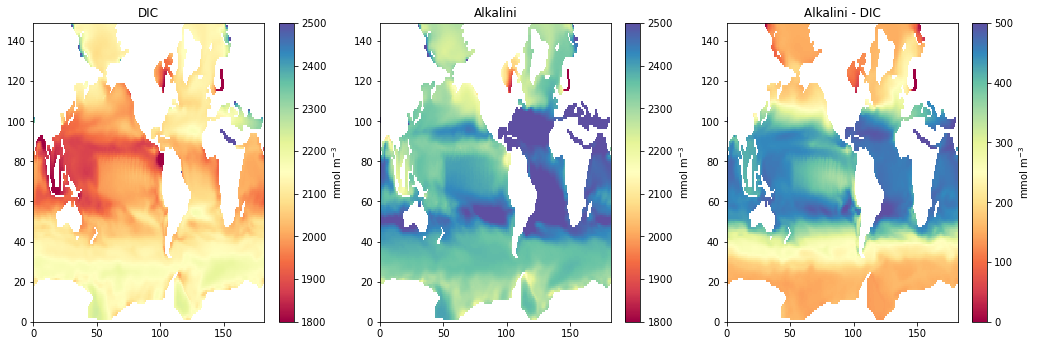

In [18]:


fact = 1e6
scal = 1.1
fig, axs = plt.subplots(1,3, figsize=(16*scal, 5*scal), facecolor='w', edgecolor='k')
axs = axs.ravel()
tlab = 'mmol m$^{-3}$'
tvar = 'DIC'
tdic = tw[tvar].values* fact
tdic[tdic == 0] = np.nan
w = axs[0].pcolormesh(tdic[0,0,:,:], cmap = 'Spectral', vmin = 1800, vmax = 2500)
plt.colorbar(w, label = tlab, ax = axs[0])
axs[0].set_title(tvar)

tlab = 'mmol m$^{-3}$'
tvar = 'Alkalini'
tdic = tw[tvar].values* fact
tdic[tdic == 0] = np.nan
w = axs[1].pcolormesh(tdic[0,0,:,:], cmap = 'Spectral', vmin = 1800, vmax = 2500)
plt.colorbar(w, label = tlab, ax = axs[1])
axs[1].set_title(tvar)


tlab = 'mmol m$^{-3}$'
tvar = 'DIC'
tdic = tw[tvar].values* fact
tvar2 = 'Alkalini'
tdic2 = tw[tvar2].values* fact
tdic3 = tdic2 - tdic #Alkalinity- DIC

tdic3[tdic3 == 0] = np.nan
w = axs[2].pcolormesh(tdic3[0,0,:,:], cmap = 'Spectral', vmin = -0, vmax = 500)
plt.colorbar(w, label = tlab, ax = axs[2])
axs[2].set_title('Alkalini - DIC')

### let's open a timeseries of data and do a weighted average. 

In [25]:
import glob

def make_yearlist(yrst, yrend, dtype, tr, baseDir):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

baseDir = '/gpfs/data/greenocean/software/runs/'
tr = 'TOM12_TJ_GEA0'
yrst = 1990
yrend = 2000
dtype = 'ptrc'

tylist = make_yearlist(yrst, yrend, dtype, tr, baseDir)

tdat = xr.open_mfdataset(tylist)
tdat

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 31, time_counter: 132, x: 182, y: 149)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
  * deptht                (deptht) float32 4.999938 15.000288 ... 5250.2266
    time_centered         (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter          (time_counter) object 1990-01-16 12:00:00 ... 2000-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(12, 31, 2), meta=np.ndarray>
    Alkalini              (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    O2                    (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    DIC                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    PIIC                  (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    NO3                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    Si                    (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    PO4                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    Fer                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    DOC                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    CaCO3                 (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    ARA                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    POC                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GOC                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    BAC                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    PRO                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    PTE                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    MES                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GEL                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    MAC                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    DIA                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    MIX                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    COC                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    PIC                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    PHA                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    FIX                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    BSi        

## area mask

In [26]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:] # area of grid cells
csize_broad = np.zeros([31,149,182])
for i in range(0,31):
    csize_broad[i,:,:] = tmesh['csize'].values
cvol = csize_broad * tmesh['e3t_0'][0,:,:,:] * tmesh['tmask'][0,:,:,:]

In [47]:
## weighted mean DIC

DIC_ts = tdat.DIC.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y']) #surface DIC
TA_ts = tdat.Alkalini.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])

/gpfs/home/mep22dku/.conda/envs/swamp2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  


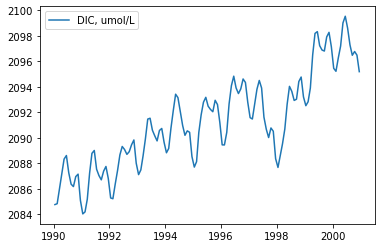

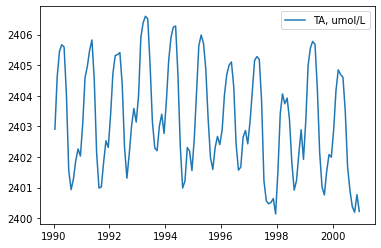

In [51]:
#multiply by 1e6 to get from mol/L to micromol/L 
dtimes = DIC_ts.indexes['time_counter'].to_datetimeindex()
plt.figure()
plt.plot(dtimes, DIC_ts*1e6, label = 'DIC, umol/L')
plt.legend()

plt.figure()
plt.plot(dtimes, TA_ts*1e6, label = 'TA, umol/L')
plt.legend()